In [207]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import math

In [208]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2021, 3, 31)

In [ ]:
# KOSPI
# link = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&marketType=stockMkt'

In [3]:
df = pd.read_excel('./data/KOSPI200_list.xlsx')
df.rename(columns={'회사명':'name', '종목코드':'code'}, inplace=True)

In [209]:
df = pd.read_excel("./data/KOSPI_list.xlsx")
df.rename(columns={'회사명':'name', '종목코드':'code'}, inplace=True)

In [210]:
df.loc[df['code']== 375500]

,name,code,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
600,DL이앤씨,375500,토목 건설업,토목 건설 사업,2021-01-25,12월,마창민,NaN,서울특별시


In [211]:
code_list = sorted(df['code'].to_list())
code_list = [f'{x:06d}' for x in code_list]

In [212]:
len(code_list)

804

In [213]:
code_list

['000020',
 '000040',
 '000050',
 '000060',
 '000070',
 '000080',
 '000100',
 '000120',
 '000140',
 '000150',
 '000180',
 '000210',
 '000220',
 '000230',
 '000240',
 '000270',
 '000300',
 '000320',
 '000370',
 '000390',
 '000400',
 '000430',
 '000480',
 '000490',
 '000500',
 '000520',
 '000540',
 '000590',
 '000640',
 '000650',
 '000660',
 '000670',
 '000680',
 '000700',
 '000720',
 '000760',
 '000810',
 '000850',
 '000860',
 '000880',
 '000890',
 '000910',
 '000950',
 '000970',
 '000990',
 '001020',
 '001040',
 '001060',
 '001070',
 '001080',
 '001120',
 '001130',
 '001140',
 '001200',
 '001210',
 '001230',
 '001250',
 '001260',
 '001270',
 '001290',
 '001340',
 '001360',
 '001380',
 '001390',
 '001420',
 '001430',
 '001440',
 '001450',
 '001460',
 '001470',
 '001500',
 '001510',
 '001520',
 '001530',
 '001550',
 '001560',
 '001570',
 '001620',
 '001630',
 '001680',
 '001720',
 '001740',
 '001750',
 '001770',
 '001780',
 '001790',
 '001800',
 '001820',
 '001880',
 '001940',
 '002020',

In [220]:
df = pdr.DataReader([x+'.KS' for x in code_list], 'yahoo',start, end)

In [227]:
df['Close'].to_csv("./data/KOSPI_close_20100101.csv")

In [214]:
df_list = []
for code in tqdm(code_list):
    df = pdr.DataReader(code+'.KS', 'yahoo', start, end)    
    df_list.append(df['Close'].rename(code))

  0%|                                                                                | 1/804 [00:06<1:24:21,  6.30s/it]


KeyboardInterrupt: 

In [57]:
K_df = pd.concat(df_list, axis=1)

In [58]:
K_df.to_csv('./data/KOSPI_close.csv')

In [60]:
K_df['000020'].

Date
2017-01-02     8110.0
2017-01-03     8110.0
2017-01-04     8150.0
2017-01-05     8210.0
2017-01-06     8160.0
               ...   
2021-03-25    14200.0
2021-03-26    14200.0
2021-03-29    14200.0
2021-03-30    14150.0
2021-03-31    14250.0
Name: 000020, Length: 1034, dtype: float64

In [44]:
df0 = pdr.DataReader('000020.KS', 'yahoo', start, end)

In [45]:
df1 = pdr.DataReader('000040.KS', 'yahoo', start, end)

In [48]:
df0['Close'].concat(df1['Close'])

AttributeError: 'Series' object has no attribute 'concat'

In [51]:
pd.concat([df0['Close'], df1['Close']], axis=1)

,Close,Close
Date,,
2017-01-02,8110.0,5327.997559
2017-01-03,8110.0,5489.997070
2017-01-04,8150.0,5531.997070
2017-01-05,8210.0,5567.997070
2017-01-06,8160.0,5531.997070
...,...,...
2021-03-25,14200.0,1385.000000
2021-03-26,14200.0,1345.000000
2021-03-29,14200.0,1290.000000


In [40]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-20,9210.0,8930.0,9070.0,8960.0,232922.0,8364.169922
2016-04-21,9050.0,8890.0,9020.0,8930.0,136782.0,8336.166992
2016-04-22,9040.0,8890.0,9000.0,8930.0,98225.0,8336.166992
2016-04-25,9630.0,8950.0,8950.0,9630.0,907794.0,8989.617188
2016-04-26,9900.0,9500.0,9600.0,9530.0,797621.0,8896.265625
...,...,...,...,...,...,...
2021-04-12,15550.0,15050.0,15150.0,15500.0,300002.0,15500.000000
2021-04-13,15550.0,15250.0,15500.0,15300.0,186169.0,15300.000000
2021-04-14,15950.0,15100.0,15250.0,15800.0,433602.0,15800.000000


In [41]:
df = pdr.DataReader('375500.KS', 'yahoo', start, end)

In [3]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2021, 3, 31)

df_null = pdr.DataReader('^KS11', "yahoo", start,end)

In [4]:
df_null

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,2031.790039,2015.680054,2022.229980,2026.160034,229900.0,2026.160034
2017-01-03,2044.069946,2028.469971,2034.310059,2043.969971,268100.0,2043.969971
2017-01-04,2046.290039,2040.609985,2046.290039,2045.640015,371500.0,2045.640015
2017-01-05,2046.500000,2039.489990,2045.520020,2041.949951,541300.0,2041.949951
2017-01-06,2051.840088,2045.660034,2048.110107,2049.120117,455400.0,2049.120117
...,...,...,...,...,...,...
2021-03-25,3024.629883,2987.830078,2995.669922,3008.330078,940400.0,3008.330078
2021-03-26,3041.860107,3012.790039,3012.790039,3041.010010,1036400.0,3041.010010
2021-03-29,3054.209961,3025.389893,3047.709961,3036.040039,1288800.0,3036.040039


In [7]:
df = pd.read_csv("./data/KOSPI_close.csv", index_col='Date')

In [8]:
log_df = np.diff(np.log(df))

In [9]:
log_df = np.log(df) - np.log(df.shift())

In [10]:
log_df.cov()

,000020,000040,000050,000060,000070,000080,000100,000120,000140,000150,...,352820,353200,357120,357250,363280,365550,375500,378850,900140,950210
000020,0.000958,0.000124,0.000083,0.000089,0.000103,0.000103,0.000173,0.000060,0.000058,0.000199,...,0.000397,0.000143,2.188979e-05,0.000006,0.000277,0.000095,0.000360,0.000045,0.000131,0.000435
000040,0.000124,0.001486,0.000082,0.000126,0.000151,0.000095,0.000106,0.000071,0.000116,0.000173,...,0.000128,0.000192,1.566287e-05,0.000030,0.000143,0.000058,0.000358,-0.000095,0.000348,0.000262
000050,0.000083,0.000082,0.000516,0.000082,0.000120,0.000078,0.000068,0.000055,0.000066,0.000126,...,0.000106,0.000082,2.709289e-08,0.000009,0.000122,0.000038,0.000025,-0.000023,0.000148,0.000149
000060,0.000089,0.000126,0.000082,0.000387,0.000109,0.000087,0.000054,0.000045,0.000070,0.000180,...,0.000075,0.000105,1.150779e-05,0.000039,0.000053,-0.000004,-0.000008,0.000195,0.000180,0.000095
000070,0.000103,0.000151,0.000120,0.000109,0.000669,0.000130,0.000129,0.000114,0.000126,0.000278,...,0.000069,0.000053,1.758061e-05,0.000032,0.000077,0.000072,0.000086,0.000056,0.000120,0.000159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365550,0.000095,0.000058,0.000038,-0.000004,0.000072,0.000019,0.000072,0.000074,0.000037,0.000082,...,0.000155,0.000132,2.040623e-06,0.000013,0.000114,0.000195,0.000152,-0.000128,-0.000043,0.000096
375500,0.000360,0.000358,0.000025,-0.000008,0.000086,0.000162,0.000207,0.000370,0.000181,0.000325,...,0.000602,0.000469,2.314773e-05,-0.000007,0.000406,0.000152,0.001074,-0.000585,0.000107,0.000952
378850,0.000045,-0.000095,-0.000023,0.000195,0.000056,-0.000344,-0.000114,-0.000295,0.000222,-0.000243,...,-0.000451,0.000209,-8.062863e-07,0.000097,0.000030,-0.000128,-0.000585,0.002268,0.000187,0.000050
900140,0.000131,0.000348,0.000148,0.000180,0.000120,0.000135,0.000109,0.000093,0.000113,0.000222,...,0.000513,0.000150,-9.780157e-06,-0.000015,0.000162,-0.000043,0.000107,0.000187,0.000874,0.000046


In [85]:
log_df.loc["2021-01-01":].isnull().any()

000020    False
000040    False
000050    False
000060    False
000070    False
          ...  
365550    False
375500     True
378850     True
900140    False
950210     True
Length: 804, dtype: bool

In [87]:
log_df.columns[log_df.loc["2021-01-01":].isnull().any()]

Index(['000300', '003410', '017180', '094800', '100220', '102260', '102280',
       '104700', '107590', '248070', '302440', '375500', '378850', '950210'],
      dtype='object')

In [11]:
log_df = log_df[log_df.columns[~log_df.loc["2021-01-01":].isnull().any()]]

In [12]:
log_df.mean()

000020    0.000546
000040   -0.001354
000050   -0.000111
000060    0.000227
000070   -0.000227
            ...   
357120    0.000509
357250    0.000762
363280   -0.000254
365550    0.002344
900140   -0.000623
Length: 790, dtype: float64

In [13]:
cc = log_df.cov().to_numpy()

In [14]:
cc

array([[ 9.57626707e-04,  1.23789718e-04,  8.26814170e-05, ...,
         2.77414367e-04,  9.48324837e-05,  1.30787743e-04],
       [ 1.23789718e-04,  1.48562981e-03,  8.22487354e-05, ...,
         1.43307995e-04,  5.82939784e-05,  3.47809644e-04],
       [ 8.26814170e-05,  8.22487354e-05,  5.15835721e-04, ...,
         1.22178680e-04,  3.77278076e-05,  1.47530536e-04],
       ...,
       [ 2.77414367e-04,  1.43307995e-04,  1.22178680e-04, ...,
         1.04618502e-03,  1.14130494e-04,  1.62064430e-04],
       [ 9.48324837e-05,  5.82939784e-05,  3.77278076e-05, ...,
         1.14130494e-04,  1.94884930e-04, -4.25152645e-05],
       [ 1.30787743e-04,  3.47809644e-04,  1.47530536e-04, ...,
         1.62064430e-04, -4.25152645e-05,  8.74315111e-04]])

In [15]:
cc.shape

(790, 790)

In [16]:
cov_inv = np.linalg.inv(cc)

In [17]:
mu = log_df.mean().to_numpy()

In [64]:
alpha = np.dot(np.dot(mu, cov_inv), mu)
beta = np.dot(cov_inv , mu).sum()
gamma = cov_inv.sum()
D = alpha*gamma - beta**2

In [65]:
def var(v):
    return math.sqrt((1+ ((gamma**2 *(v-beta/gamma)**2 / D))) / gamma)

In [154]:
_x = math.sqrt(1/gamma)

In [67]:
_y = beta / gamma

In [152]:
var(_y)

0.0009339796812809524

In [155]:
_x

0.0009339796812809524

In [156]:
_y

-8.888130469248007e-05

In [68]:
var(_y+0.1)

0.13337099652789158

In [204]:
#y_l = np.linspace( _y, 3.5, 300).tolist()
y_l = np.linspace( -0.01, 0.01, 300).tolist()
x_l = [var(x) for x in y_l]

In [162]:
_m,_c =mu[0], cc[0][0]

In [160]:
cc[0][0]

0.0009576267068489688

In [169]:
c_l = []
for i in range(mu.size):
    c_l.append(math.sqrt(cc[i][i]))

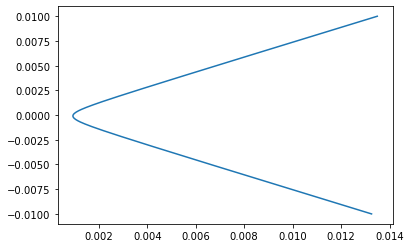

In [206]:
plt.plot(x_l, y_l)
#plt.plot(c_l,mu, marker='o', linestyle="none")

In [201]:
_y

-8.888130469248007e-05

In [162]:
df = pdr.DataReader('TB3MS', 'fred', start, end)

In [164]:
df.to_csv('./data/TBILL.csv')

In [25]:
df = pd.read_csv('./data/TBILL.csv')

In [147]:
rf_ret = math.log(1+0.01*df.mean().values[0])

In [148]:
E = alpha - 2*beta*rf_ret + gamma * rf_ret**2

In [141]:
def CML(risk):
    return rf_ret + math.sqrt(E)*risk

In [146]:
line_x = np.linspace(0, 0.001, 100).tolist()
line_y = [CML(x) for x in line_x]

In [143]:
math.sqrt(E)/ (beta - rf_ret* gamma)

-0.0011104661929290732

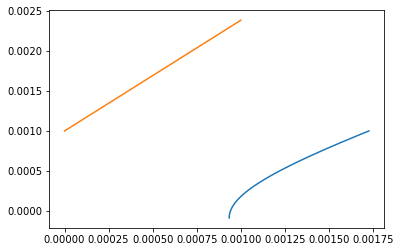

In [149]:
plt.plot(x_l, y_l)
plt.plot(line_x, line_y)

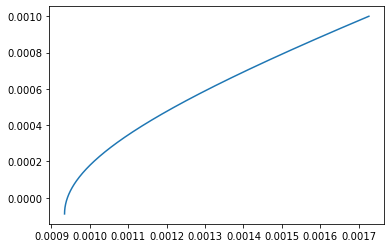

In [150]:
plt.plot(x_l, y_l)

In [138]:
math.sqrt(E)/ (beta - rf_ret* gamma)

-0.0009354438835779056

In [151]:
rf_ret+ E/(beta - rf_ret*gamma)

-0.00012810998076331383